**Цель работы:**

Осуществить предварительную обработку данных csv-файла, выявить и устранить проблемы в этих данных.

# Загрузка набора данных

### Описание предметной области

Вариант № 3 (18)

Набор данных drivers2.csv

Содержит информацию о поездках в такси:
1. Дата и время начала
2. Дата и время окончания
3. Категория
4. Место начала (можно не проверять данный столбец на наличие неявных
дубликатов)
5. Место окончания (можно не проверять данный столбец на наличие неявных
дубликатов)
6. Пройденные мили
7. Цель поездки
8. Время поездки в минутах
9. Скорость в пути
10. Цена поездки

### 1.Чтение файла (набора данных)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 8

data_df = pd.read_csv('drivers2.csv')

### 2. Обзор данных

2.1 Вывод первых 20 строк с помощью метода head.

In [2]:
data_df.head(20)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,time,speed,price
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,51.000000,788.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,25.000000,1237.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,22.153846,1312.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,20.142857,1387.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,57.044776,5376.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,4.0,64.500000,638.0
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,5.0,85.200000,714.0
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,6.0,8.000000,787.0
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,20.0,24.900000,1838.0
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,27.0,36.666667,2365.0


2.2 Оценка данных с помощью метода info.

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1099 non-null   object 
 1   END_DATE*    1099 non-null   object 
 2   CATEGORY*    1099 non-null   object 
 3   START*       1099 non-null   object 
 4   STOP*        1099 non-null   object 
 5   MILES*       1099 non-null   float64
 6   PURPOSE*     598 non-null    object 
 7   time         1099 non-null   float64
 8   speed        1099 non-null   float64
 9   price        1099 non-null   float64
dtypes: float64(4), object(6)
memory usage: 86.0+ KB


2.3 Оценка данных с помощью метода describe.

In [4]:
data_df.describe()

,MILES*,time,speed,price
count,1099.000000,1099.000000,1099.000000,1099.000000
mean,10.803094,23.300273,inf,2085.929936
std,22.044580,27.745836,NaN,2084.368402
min,0.500000,0.000000,3.917355,337.000000
25%,2.900000,10.000000,15.346667,1087.000000
50%,6.000000,16.000000,21.333333,1539.000000
75%,10.500000,27.000000,28.915033,2365.500000
max,310.300000,336.000000,inf,25569.000000



---

**Выводы:**
  
По столбцу `time` и строкам `min` и `max` можно определить - диапазон  времени поездки  от 0 до 336 (хотя нулевое время, вызывает сомнения относительно корректности данных) 


В строке `mean` и `max` и столбцу `speed` можно заметить значение inf, что тоже указывает на некорректные данные. 



 2.4 Оценка названий столбцов

In [5]:
data_df.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'time', 'speed', 'price'],
      dtype='object')

нужно привести всё к одному регистру и верному названия(убрать звёздочки)

In [6]:
data_df.columns = data_df.columns.str.replace('*', '').str.lower()
display(data_df.head())

,start_date,end_date,category,start,stop,miles,purpose,time,speed,price
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,51.000000,788.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,12.0,25.000000,1237.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,22.153846,1312.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,20.142857,1387.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,57.044776,5376.0


### 3. Проверка пропусков

In [7]:
data_df.isnull().sum()

start_date      0
end_date        0
category        0
start           0
stop            0
miles           0
purpose       501
time            0
speed           0
price           0
dtype: int64


---

В результате было обнаружено 500 и 1 пропуск в purpose (цели) поездки, для ясности заменим на "не выяснено"

 ---

In [8]:
data_df['purpose'] = data_df['purpose'].fillna('не выяснено') 

### 4. Проверка дубликатов

#### Проверка явных дубликатов

In [9]:
# Проверить наличие явных дубликатов
print("Количество явных дубликатов до удаления:", data_df.duplicated().sum())

Количество явных дубликатов до удаления: 0


### 5. Аномальные значения

Был выполнен возврат к "подозрительным" данным, для начала необходимо просто просмотреть данные записи

In [10]:
zero_time_rows = data_df[
    (data_df['time'] <= 0)|
    (np.isinf(data_df['speed']))
]

zero_time_rows

,start_date,end_date,category,start,stop,miles,purpose,time,speed,price
750,2016-09-06 17:49:00,2016-09-06 17:49:00,Business,Unknown Location,Unknown Location,69.1,не выяснено,0.0,inf,359.0
760,2016-09-16 07:08:00,2016-09-16 07:08:00,Business,Unknown Location,Unknown Location,1.6,не выяснено,0.0,inf,338.0
797,2016-10-08 15:03:00,2016-10-08 15:03:00,Business,Karachi,Karachi,3.6,не выяснено,0.0,inf,338.0
806,2016-10-13 13:02:00,2016-10-13 13:02:00,Business,Islamabad,Islamabad,0.7,не выяснено,0.0,inf,337.0


Время начала и окончания поездки совпадает, что делает невозможным движение при ненулевых милях. При этом рассчитанная скорость равна «inf», что подтверждает ошибку вычислений из-за деления на ноль. Также цена поездки при нулевом времени выглядит недостоверной. Принято решение исключить данные записи из анализа, так как они содержат логические противоречия.

In [11]:
clean_df = data_df[
    (data_df['miles'] >= 0) &
    (data_df['time'] > 0) &
    (data_df['price'] >= 0) &
    (~np.isinf(data_df['speed']))
]

print(f"Итоговый размер датасета после очистки: {clean_df.shape}")

Итоговый размер датасета после очистки: (1095, 10)


### 6. Общие задания лабораторной работы

#### Матрица диаграмм рассеяния

*`Формулировка задания`*
2. Построить точечную диаграмму (матрицу диаграмм рассеяния) для всех признаков. Выполнить анализ полученной диаграммы, отвечая на вопрос показывает ли она в    среднем определенную зависимость между переменными. Изучите параметры и опишите взаимосвязи. Если параметров слишком много – может потребоваться создать несколько графиков. Минимум один график (диаграмму рассеивания) сделать по категориям (Например, зависимость зарплаты и возраста по каждой должности. На таком графике различные должности должны быть показаны разными цветами).



Для построения матрицы диаграмм рассеяния была использована функция pairplot() из библиотеки Seaborn.

Данная функция предназначена для визуализации попарных зависимостей между числовыми признаками и позволяет одновременно отобразить распределение значений признаков и взаимосвязи между ними.

В качестве параметров функции были заданы:

`hue='category'` — параметр, определяющий категориальный признак, по значениям которого точки на диаграмме окрашиваются в разные цвета;

`diag_kind='hist'` — параметр, задающий тип графика на диагонали матрицы; в данном случае выбраны гистограммы для отображения распределений признаков;

`plot_kws={'alpha': 0.6}` — словарь дополнительных параметров, где значение alpha отвечает за степень прозрачности точек на графиках (0 — полностью прозрачные, 1 — непрозрачные);

`palette='Set2'` — выбор цветовой палитры для категорий.

После построения графика при помощи функций `plt.suptitle()`, `plt.tight_layout()` и `plt.show()` были добавлены общий заголовок, автоматическая настройка отступов между элементами визуализации и вывод итогового изображения соответственно.


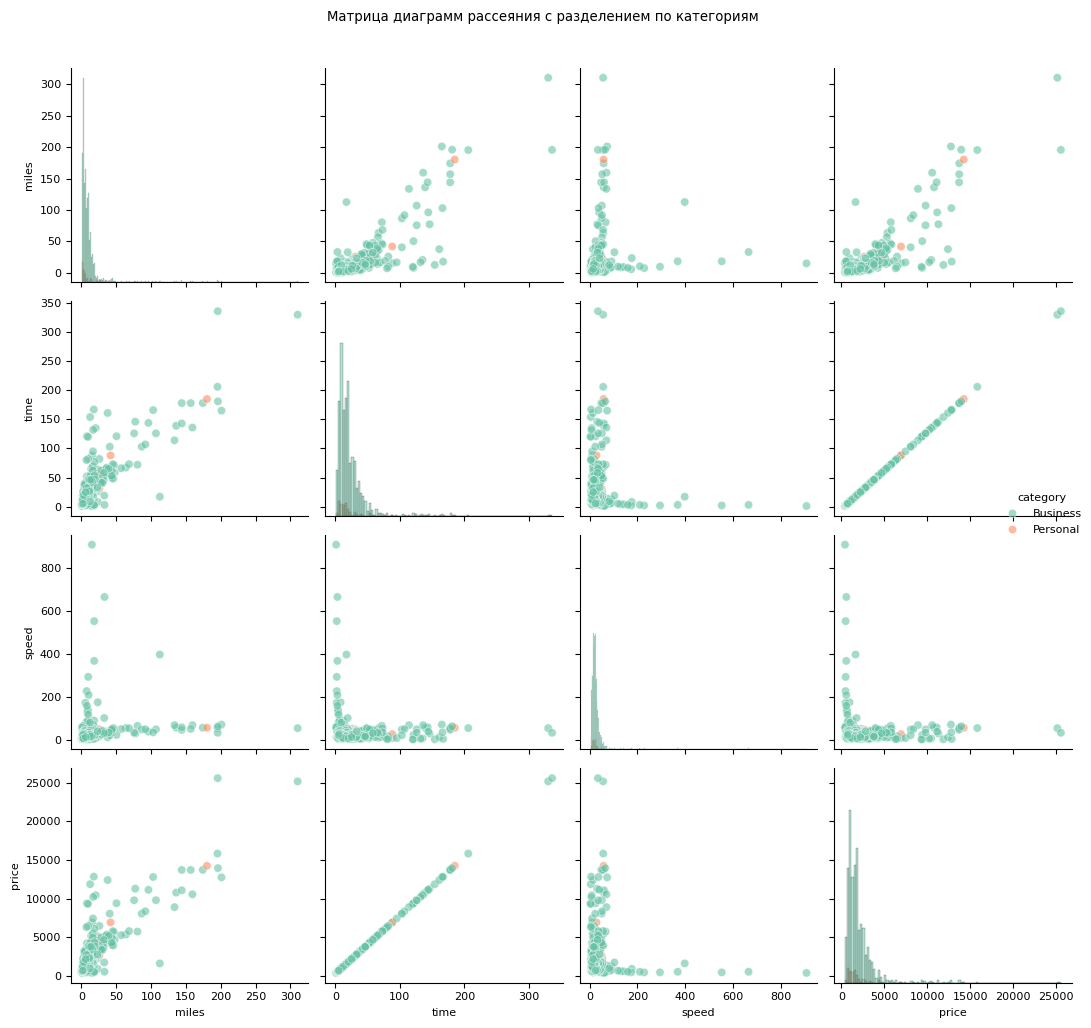

In [12]:
numeric_cols = ['miles', 'time', 'speed', 'price']
sns.pairplot(clean_df[numeric_cols + ['category']],
             hue='category',
             diag_kind='hist',
             plot_kws={'alpha': 0.6}, #делает точки полупрозрачными, чтобы лучше различались плотные скопления.
             palette='Set2')
plt.suptitle('Матрица диаграмм рассеяния с разделением по категориям', y=1.02)
plt.tight_layout() #автоматически подбирает отступы между графиками
plt.show()

**Выводы**

При анализе попарных зависимостей выявлено следующее:

Между `time` и `price` наблюдается явная положительная линейная зависимость — с увеличением времени поездки её стоимость возрастает почти пропорционально. Данная взаимосвязь наиболее выражена из всех представленных. Между `miles` и `price`, а также `miles` и `time` также прослеживается положительная зависимость, однако она выражена слабее и характеризуется большим разбросом точек.

Распределение категорий показывает, что наблюдений, относящихся к категории Personal, значительно меньше, чем Business. В связи с этим делать выводы о различиях между категориями некорректно из-за недостаточного количества данных в одной из групп.

#### Гистограммы для каждого числового признака

*`Формулировка задания`*
3. Постройте гистограммы для каждого числового признака, подберите оптимальное
количество bins, сделайте выводы по полученными гистограммам.


Для построения гистограмм была создана сетка графиков размером 2×2 с помощью функции `plt.subplots()` из библиотеки Matplotlib.
Данный приём позволяет отобразить несколько графиков на одной фигуре, обеспечивая компактное и удобное сравнение распределений различных признаков.
Параметр `figsize=(14, 10)` задаёт размеры всей фигуры, а функция `fig.suptitle()` формирует общий заголовок для всех подграфиков, отражающий суть визуализации.

Для каждого числового признака была построена отдельная гистограмма с помощью метода `hist()`.
Гистограмма показывает распределение значений признака, то есть частоту появления наблюдений в определённых диапазонах.
Каждое значение признака попадает в один из интервалов `(bins)`, и высота столбца отражает количество наблюдений, принадлежащих этому интервалу.

В параметрах функции hist() были заданы следующие настройки:

`bins` — количество интервалов, на которые делится диапазон значений. Подбор этого параметра позволяет сделать распределение более наглядным: слишком малое значение приводит к потере деталей, слишком большое — к шумности графика;

`color` — цвет столбцов гистограммы, выбран для визуального различия между графиками;

`edgecolor='black'` — задаёт чёрную границу столбцов, что делает распределение более читаемым;

`alpha=0.7` — определяет степень прозрачности столбцов, позволяя визуально смягчить цвет и сделать график менее перегруженным.

Для каждого подграфика дополнительно указаны подписи осей `(set_xlabel, set_ylabel)` и заголовок `(set_title)`, отражающие смысл отображаемого признака.
Команда `grid(axis='y', alpha=0.3)` добавляет горизонтальную сетку для облегчения восприятия частотных значений.

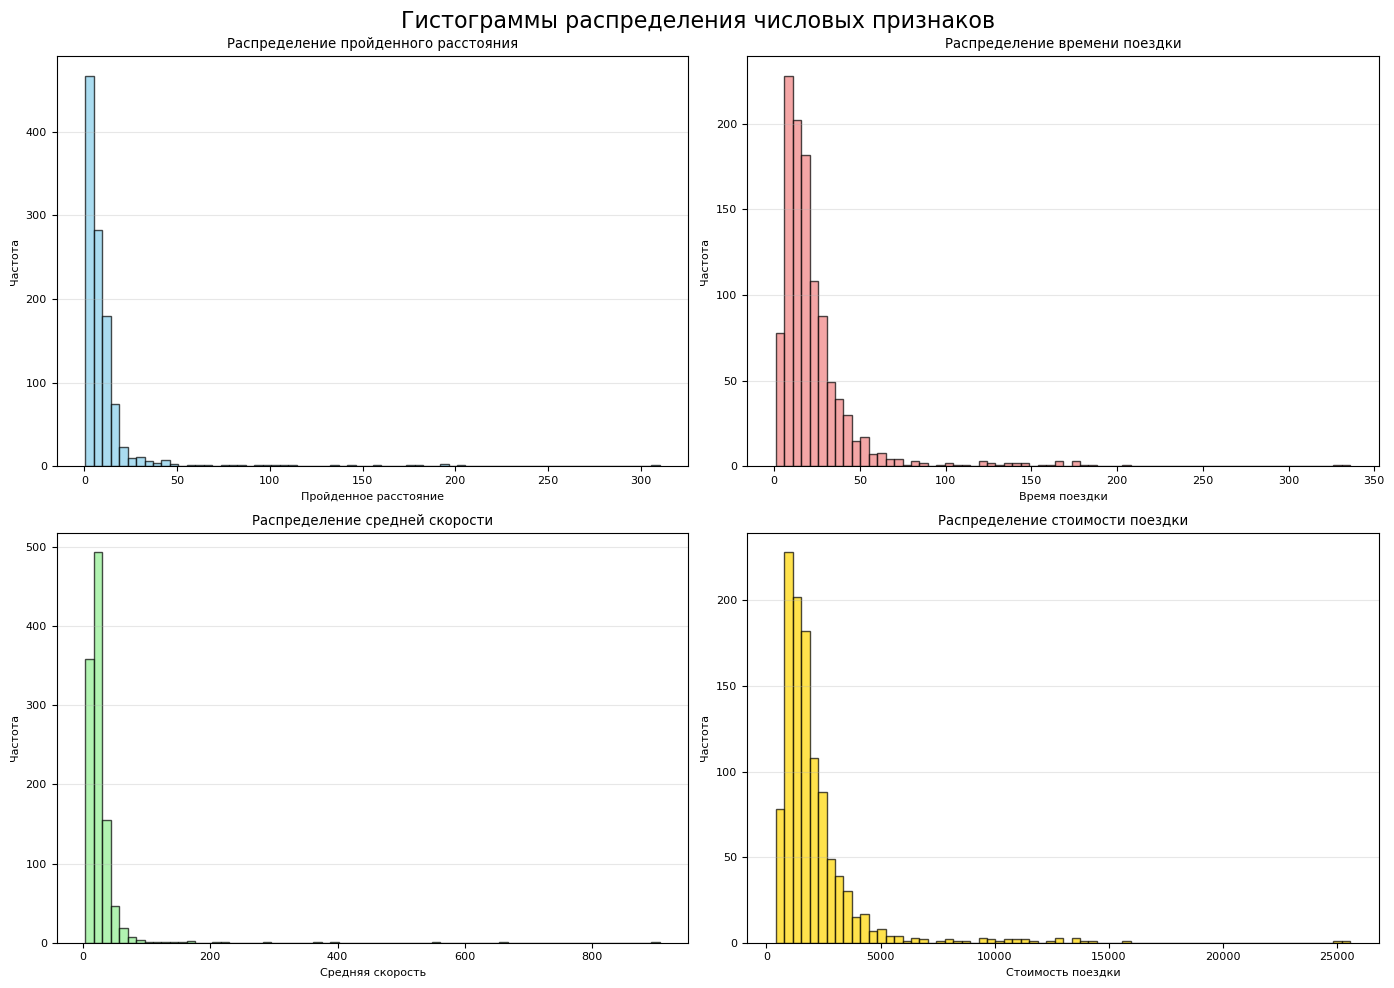

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Гистограммы распределения числовых признаков', fontsize=16)

axes[0, 0].hist(clean_df['miles'], bins=68, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Пройденное расстояние')
axes[0, 0].set_ylabel('Частота')
axes[0, 0].set_title('Распределение пройденного расстояния')
axes[0, 0].grid(axis='y', alpha=0.3)

axes[0, 1].hist(clean_df['time'], bins=68, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Время поездки')
axes[0, 1].set_ylabel('Частота')
axes[0, 1].set_title('Распределение времени поездки')
axes[0, 1].grid(axis='y', alpha=0.3)

axes[1, 0].hist(clean_df['speed'], bins=68, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Средняя скорость')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title('Распределение средней скорости')
axes[1, 0].grid(axis='y', alpha=0.3)

axes[1, 1].hist(clean_df['price'], bins=68, color='gold', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Стоимость поездки')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_title('Распределение стоимости поездки')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

**Выводы**

Анализ полученных гистограмм показал, что все распределения имеют правостороннюю асимметрию. Это означает, что основная масса поездок характеризуется небольшими значениями расстояния, времени, скорости и стоимости, тогда как более высокие значения встречаются значительно реже.
Преобладают короткие, быстрые и недорогие поездки, что приводит к концентрации данных в узком диапазоне малых значений. 

Большинство поездок было меньше 15 миль (3 самых высоких столбика),  около 5 - 20 минут (3 самых высоких столбика) со скорость до 60 и стоимостью около 500 до 2000

#### Анализ корреляций

*`Формулировка задания`*

Исследовать взаимосвязь между переменными с помощью оценки коэффициента корреляции и ковариации. Построить heatmap (тепловую карту корреляции).
Выполнить интерпретацию результатов корреляции и ковариации, отвечая на вопросы о наличии (отсутствии) линейной взаимосвязи между переменными. Понимать, что такое корреляция и ковариация.

`clean_df[numeric_cols]` — из очищенного датафрейма выбирается подтаблица только с числовыми столбцами 

`.corr()` — метод pandas, который вычисляет матрицу корреляций между всеми парами выбранных числовых признаков. По умолчанию используется коэффициент Пирсона.

На выходе получается квадратная таблица (DataFrame) размера n×n, где n — число числовых признаков.

Диагональ матрицы содержит 1.0 (корреляция признака с самим собой).Элементы выше/ниже диагонали — это значения корреляции для пар признаков, лежащие в диапазоне [-1, 1].

In [14]:
correlation_matrix = clean_df[numeric_cols].corr()

Создаётся новая фигура Matplotlib размером 10×8 дюймов c помощью `plt.figure`. Это задаёт пространство, в котором будет рисоваться тепловая карта.

Ключевая команда — `sns.heatmap` строит тепловую карту по матрице корреляций. С параметрами:

`correlation_matrix` — входные данные (матрица корреляций).

`annot=True` — в каждой ячейке карты будет отображено числовое значение (аннотация) — сам коэффициент корреляции.

`fmt='.3f'` — формат вывода аннотаций: три знака после запятой (например, 0.873).

`cmap='coolwarm'` — цветовая карта (colormap). В coolwarm положительные значения окрашиваются в тёплые тона (красные), отрицательные — в холодные (синие). Это делает направление корреляции визуально очевидным.

`center=0` — центрирование цветовой шкалы по нулю. Это важно: ноль будет нейтрального цвета, положительные и отрицательные отклонения окрашены симметрично.

`square=True` — все ячейки будут квадратными.

`linewidths=1` — толщина линий-разделителей между ячейками (в пикселях/единицах Matplotlib). Такие линии помогают визуально разграничивать ячейки.

`cbar_kws={"shrink": 0.8}` — дополнительные параметры для полосы цветовой шкалы (colorbar). Указан shrink=0.8, что уменьшает высоту полосы до 80% для более аккуратного размещения.

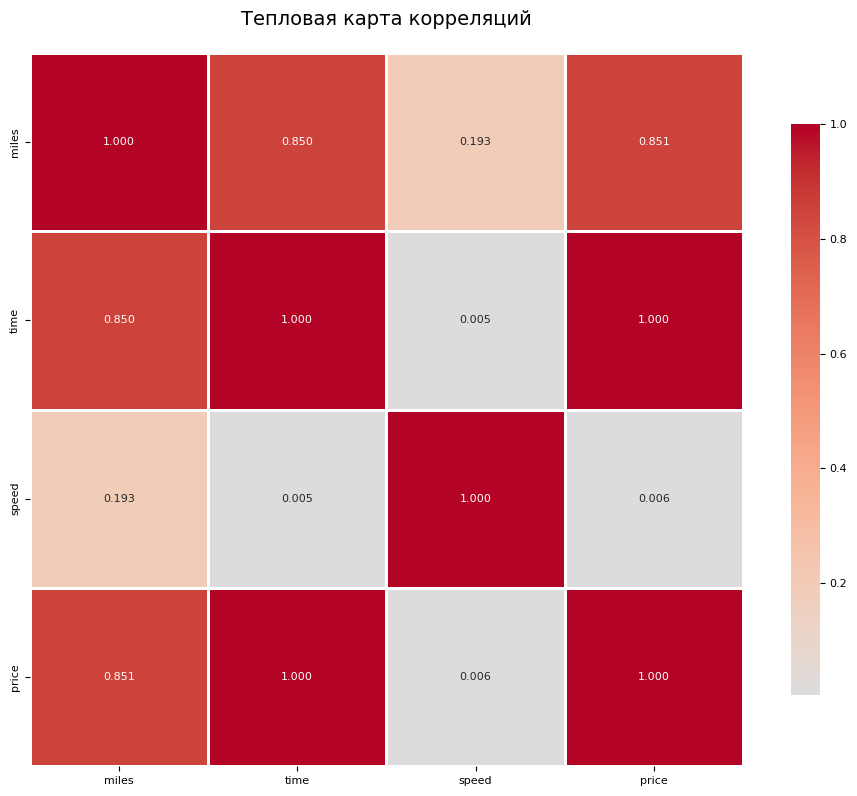

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.3f',
            cmap='coolwarm',
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Тепловая карта корреляций', fontsize=14, pad=20) #pad -отступ
plt.tight_layout()
plt.show()

##### Вычислим  так же ковариацию

Метод `.cov()` вычисляет ковариационную матрицу — таблицу, показывающую, как пары числовых признаков совместно изменяются.

Каждый элемент матрицы — это ковариация между двумя признаками.

Если ковариация положительная, это значит, что оба признака растут или уменьшаются вместе.

Если отрицательная — когда один увеличивается, другой, как правило, уменьшается.

Если значение близко к нулю — связи между изменениями почти нет.

На диагонали матрицы находятся дисперсии (ковариация признака с самим собой).

In [16]:
covariance_matrix = clean_df[numeric_cols].cov()
covariance_matrix

,miles,time,speed,price
miles,484.414811,519.332857,187.193450,3.905647e+04
time,519.332857,770.653900,6.170935,5.789488e+04
speed,187.193450,6.170935,1950.082519,5.204055e+02
price,39056.466480,57894.879112,520.405543,4.349329e+06


**Выводы по тепловой карте корреляции:**

Анализ матрицы корреляций показал наличие сильной положительной связи между признаками стоимости поездки (price) и расстояния (miles), а также между стоимостью и временем поездки (time) — коэффициенты корреляции для этих пар находятся в диапазоне 0.85–1.0. Это свидетельствует о том, что именно расстояние и время являются основными факторами, влияющими на формирование цены поездки.
Кроме того, между признаками miles и time также наблюдается выраженная положительная корреляция (около 0.85), что логично: чем длиннее поездка, тем больше времени она занимает.
Признак скорость (speed) демонстрирует слабую корреляцию с ценой, что ожидаемо, так как стоимость поездки определяется главным образом длительностью и протяжённостью маршрута, а не средней скоростью движения.

#### График типа hexagonal binning plot

*`Формулировка задания`*

Выполните минимум один любой график типа hexagonal binning plot. Сделайте выводы.


Создаётся объект фигуры (fig) и объект координатных осей (ax) размером 12×8 дюймов.
На этих осях далее строится график.

Функция `plt.subplots()` создаёт "пару" объектов:

`fig` — это вся фигура, то есть область холста, где размещаются графики.

`ax` — это объект осей (axes), то есть конкретная система координат, на которой строится график.



`ax.hexbin()` строит шестигранную диаграмму плотности (Hexbin Plot) — разновидность точечной диаграммы, где пространство разбивается на шестиугольники (ячейки), и в каждом шестиугольнике подсчитывается количество точек (наблюдений), попавших внутрь.

Этот тип графика используется, когда данных много, и обычный scatter-plot превращается в “облако” из наложенных точек.

Параметры:

`clean_df['time']` — значения по оси X (время поездки).

`clean_df['price']` — значения по оси Y (стоимость поездки).

`gridsize=25` — задаёт размер сетки (число шестиугольников вдоль одной оси). Чем больше значение, тем мельче ячейки и тем точнее визуализация плотности.

`cmap='Greens'` — цветовая схема. Более насыщенный зелёный цвет показывает области с большим количеством наблюдений.

`mincnt=1` — ячейки с количеством точек меньше 1 не отображаются (то есть показываются только зоны, где есть хотя бы одно наблюдение).

Далее добавляется цветовая шкала (`colorbar`) — поясняет, что оттенок цвета соответствует числу поездок, попавших в каждую ячейку.

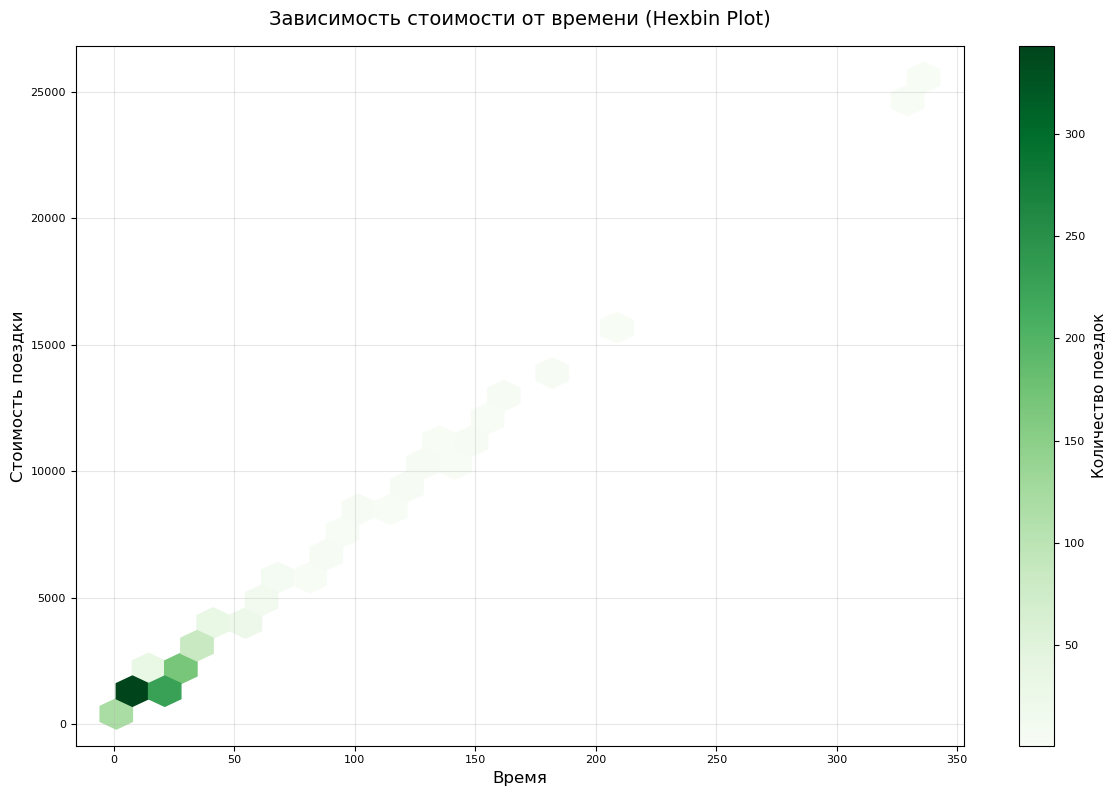

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

hexbin = ax.hexbin(clean_df['time'],
                   clean_df['price'],
                   gridsize=25,
                   cmap='Greens',
                   mincnt=1)

ax.set_xlabel('Время', fontsize=12)
ax.set_ylabel('Стоимость поездки', fontsize=12)
ax.set_title('Зависимость стоимости от времени (Hexbin Plot)', fontsize=14, pad=15)
ax.grid(True, alpha=0.3) #сетка

cb = plt.colorbar(hexbin, ax=ax)
cb.set_label('Количество поездок', fontsize=11)

plt.tight_layout()

**Выводы по hexagonal binning plot**

На графике шестигранной плотности (Hexbin Plot) видно, что основная масса поездок сосредоточена в диапазоне около 10 минут по времени и 1500 по стоимости.
Наблюдается явная положительная зависимость между временем и стоимостью поездки: с увеличением продолжительности цена, как правило, возрастает.
Долгие и дорогие поездки встречаются значительно реже.

#### Задание 1 Варианта 3

*`Формулировка задания`* Задание 1 : Использовать seaborn. По группировке - CATEGORY и количество поездок каждого типа (по цели маршрута - PURPOSE) отфильтровать данные группировки по количеству поездок больше 2 и построить диаграмму вида представленного в методических указаниях


In [18]:
#группировка данных
gr1_data = clean_df.groupby(['category', 'purpose']).size().reset_index(name='count')

# фильтрация данных, ограничение:  только группы с количеством поездок > 2
data_q1 = gr1_data[gr1_data['count'] > 2]

display(data_q1)

,category,purpose,count
1,Business,Between Offices,17
2,Business,Customer Visit,94
3,Business,Errand/Supplies,110
4,Business,Meal/Entertain,145
5,Business,Meeting,178
6,Business,Temporary Site,46
7,Business,не выяснено,426
10,Personal,Moving,4
11,Personal,не выяснено,71


Далее выполняется группировка данных по двум признакам: purpose — цель поездки, category — категория поездки.
    
Это значит, что каждая уникальная комбинация цели и категории рассматривается как отдельная группа.
`['count'].sum()` — для каждой группы подсчитывается суммарное количество поездок (суммируются значения из столбца count).

`sns.barplot(...)` — строит столбчатую диаграмму (bar plot) с помощью библиотеки Seaborn.
Параметры:

`data=pivot_q1` — источник данных;

`x='purpose'` — категории по оси X (цели поездок);

`y='count'` — высота столбцов (количество поездок);

`hue='category'` — добавляет цветовое разделение по категориям (например, Business и Personal).

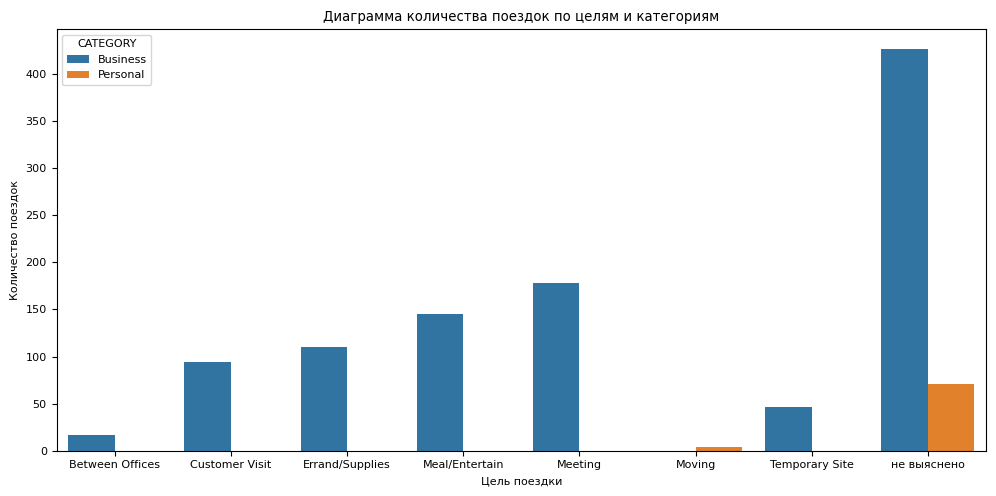

In [19]:
pivot_q1 = data_q1.groupby(['purpose', 'category'])['count'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=pivot_q1, x='purpose', y='count', hue='category')

plt.title('Диаграмма количества поездок по целям и категориям')
plt.xlabel('Цель поездки')
plt.ylabel('Количество поездок')
plt.legend(title='CATEGORY')
plt.tight_layout()
plt.show()

**Выводы по первому заданию**

В данных присутствует значительное количество записей, в которых цель поездки не указана.
Наиболее популярной комбинацией является поездка типа Business с целью Meeting.
Анализ показал, что поездки категории Business преимущественно совершаются с целями, связанными со встречами и развлечения/еда. Поездки категории Personal чаще всего представляют собой обычные перемещения без конкретной цели. 

#### Задание 2 Варианта 3

*`Формулировка задания`* Задание 2: Использовать pandas и plot. По сводной таблице (pivot_table) - отобразить среднее количество пройденных миль по каждой цели поездки (PURPOSE). Оставить только маркеры в виде ★ зеленого цвета размеров 18.  

Создание сводной таблицы

In [20]:
pivot_miles = clean_df.pivot_table(values='miles', index='purpose', aggfunc='mean')
display(pivot_miles)

,miles
purpose,
Airport/Travel,6.200000
Between Offices,11.229412
Charity ($),15.100000
Commute,180.200000
Customer Visit,21.896809
Errand/Supplies,4.136364
Meal/Entertain,5.660000
Meeting,15.586517
Moving,4.550000


`.plot()` — метод pandas, который рисует график.

Параметры:

`marker='*'` — каждая точка обозначается звёздочкой;

`linestyle=''` — линии между точками не проводятся (только отдельные маркеры);

`color='green'` — цвет маркеров зелёный;

`markersize=18` — размер маркеров;

`ax=plt.gca()` — строить график на текущих осях (это важно, чтобы можно было потом добавлять надписи на те же оси).

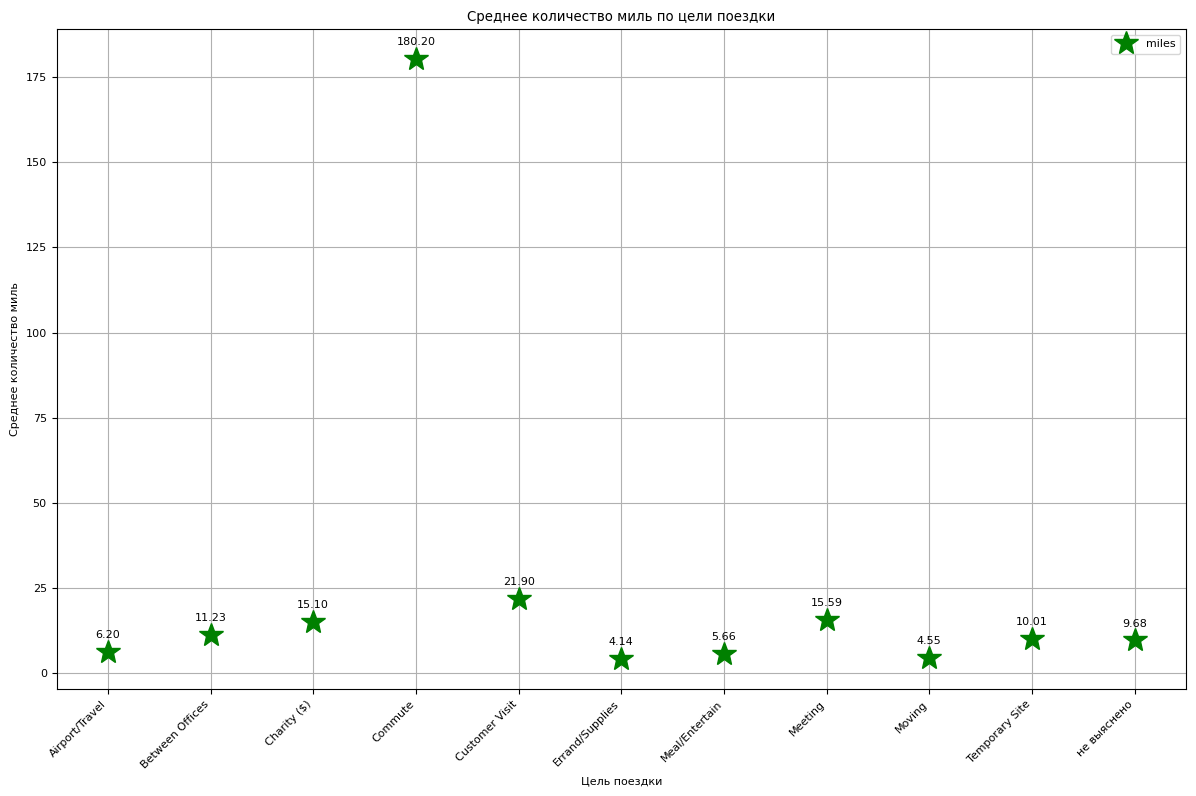

In [21]:
plt.figure(figsize=(12, 8))

ax = pivot_miles.plot(marker='*', linestyle='', color='green', markersize=18, ax=plt.gca())

plt.title('Среднее количество миль по цели поездки')
plt.xlabel('Цель поездки')
plt.ylabel('Среднее количество миль')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

for i, (purpose, miles) in enumerate(pivot_miles['miles'].items()):
    ax.annotate(f'{miles:.2f}', (i, miles), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_xticks(range(len(pivot_miles.index)))
ax.set_xticklabels(pivot_miles.index, rotation=45, ha='right')


plt.tight_layout()
plt.show()

**Выводы**

В результате анализа  можно сказать,ч то самые длинные поездки были по цели Commute и составляли 180 миль, на  втором месте цель Customer Visit на 22 миль и Meeting 16 миль. Самые короткие Errand/Supplies и Moving 4 мили.

#### Задание 3 Варианта 3

*`Формулировка задания`*
Задание 3: Использовать matplotlib. Построить круговую диаграмму, которая отображает процент по каждой цели поездки. Уберите из диаграммы количество
поездок меньше 5.

In [22]:
purpose_cnts = clean_df['purpose'].value_counts()

# Фильтрация: убираем цели с количеством поездок < 5
purpose_q2 = purpose_cnts[purpose_cnts >= 5]

display(purpose_q2)

purpose
не выяснено        497
Meeting            178
Meal/Entertain     145
Errand/Supplies    110
Customer Visit      94
Temporary Site      46
Between Offices     17
Name: count, dtype: int64

`colors = plt.cm.Set3(range(len(purpose_q2)))`
`plt.cm.Set3` — встроенная цветовая палитра (`colormap`) Matplotlib, которая содержит гармоничные пастельные цвета.

`range(len(purpose_q2))` — создаёт столько цветов, сколько уникальных целей поездки.В результате каждый сектор диаграммы получает свой уникальный цвет.

`explode = [0.05 if i == 0 else 0 for i in range(len(purpose_q2))]`
Параметр explode управляет смещением сектора от центра.

В данном случае от центра немного (на 0.05 радиуса) отодвигается только первый сектор, остальные остаются на месте.
Это делается, чтобы визуально выделить наиболее значимую категорию.


Это основной вызов функции `plt.pie` построения круговой диаграммы.

Параметры:

`purpose_q2` — данные 

`labels=purpose_q2.index` — подписи для каждого сектора (названия целей поездок).

`autopct='%1.1f%%'` — автоматически выводит процент внутри сектора с одним десятичным знаком (например, 15.3%).

`startangle=90` — начало построения диаграммы с угла 90°, чтобы первый сектор начинался сверху (в 12 часов).

`colors=colors` — список цветов, созданный ранее.

`explode=explode` — определяет, какие сектора “выдвинуть” наружу.

`textprops={'size': 'x-large', 'weight': 'bold'}` — задаёт стиль шрифта для подписей: увеличенный размер и полужирное начертание.

`pctdistance=0.85` — регулирует положение процентов внутри сектора (чем меньше значение, тем ближе к центру).


Далее добавляется легенда с названиями категорий:

`fontsize=11` — размер шрифта легенды;

`bbox_to_anchor=(1.3, 1)` — сдвигает легенду за пределы диаграммы (справа сверху), чтобы она не перекрывала график;

`loc='upper left'` — определяет ориентацию привязки к фигуре.

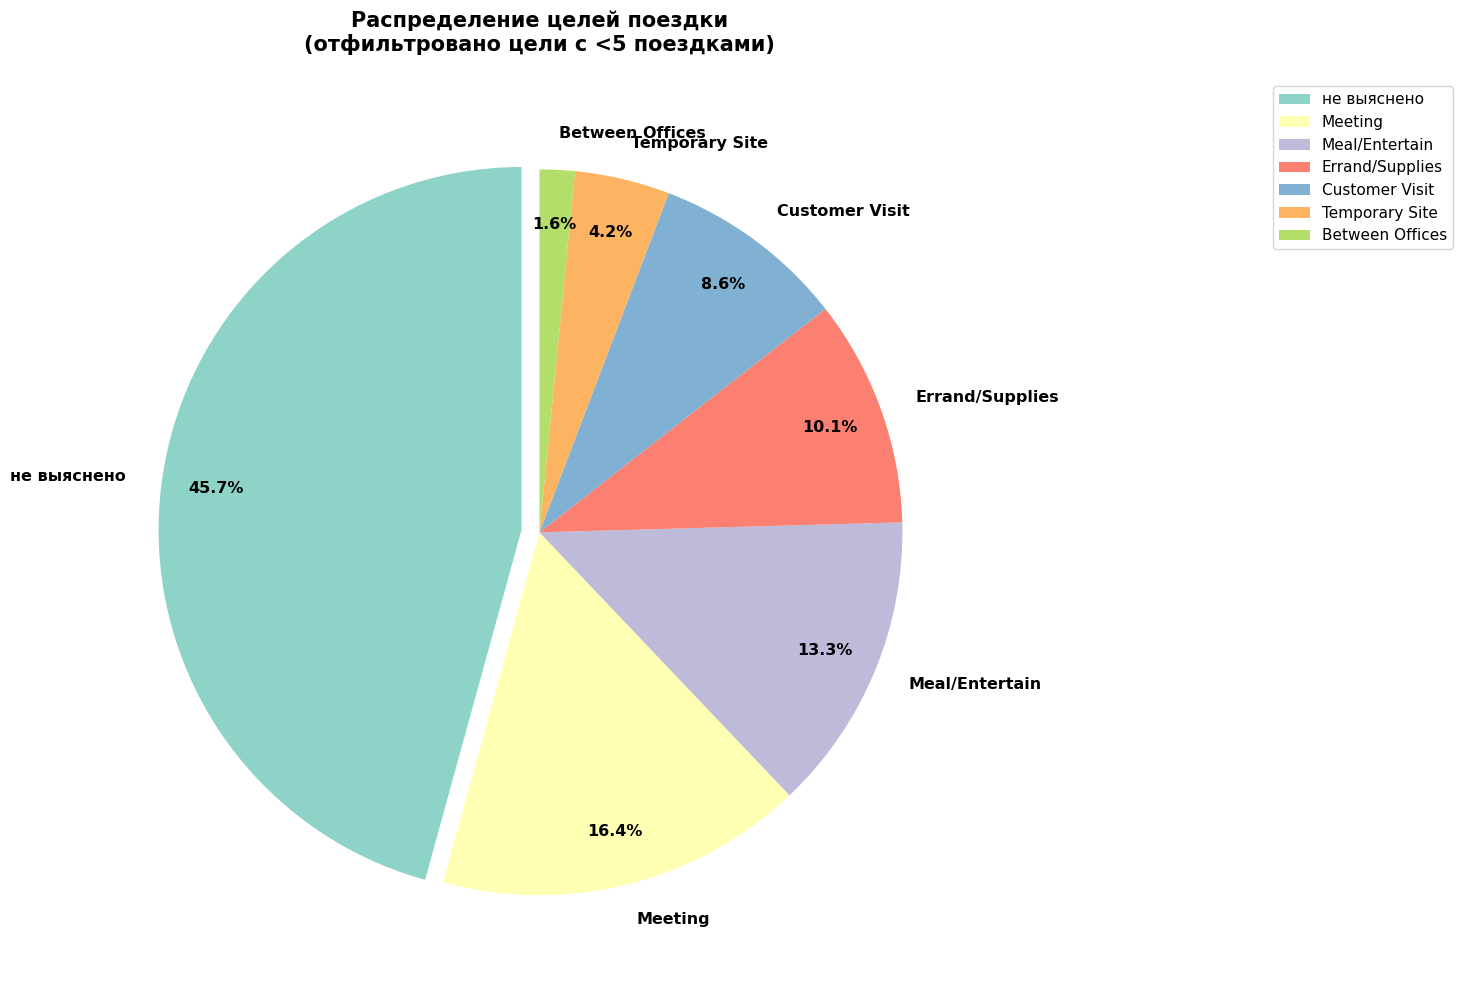

In [23]:
plt.figure(figsize=(14, 10))

colors = plt.cm.Set3(range(len(purpose_q2)))
explode = [0.05 if i == 0 else 0 for i in range(len(purpose_q2))] #эффект “вытянутого кусочка”

plt.pie(purpose_q2,
        labels=purpose_q2.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        explode=explode,
        textprops={'size': 'x-large', 'weight': 'bold'},
        pctdistance=0.85)

plt.title('Распределение целей поездки\n(отфильтровано цели с <5 поездками)',
          fontsize=15, pad=20, weight='bold')
plt.legend(purpose_q2.index,
          fontsize=11,
          bbox_to_anchor=(1.3, 1),
          loc='upper left')
plt.tight_layout()
plt.show()

**Выводы**

Наибольшее количество поездок (45,7%) было зафиксировано без указания цели.

Среди поездок с указанной целью наиболее популярными оказались: «Meeting» — 16,4%, «Meal/Entertain» — 13,3% и «Errand/Supplies» — 10,1%. Редкие цели (менее 5 поездок) были исключены из анализа.

### Диаграммы размаха (Boxplot)

*`Формулировка задания`* 

Выполните минимум один график типа boxplot для любого столбца. Сделайте выводы.

#### Базовый Boxplot для стоимости поездки

Основная команда
`plt.boxplot()` строит ящик с усами по данным из столбца 'PRICE' — стоимости поездки.

Параметры подробно:
`clean_df['price']` — данные, которые анализируются (стоимость поездки).

`vert=False` — строит горизонтальный boxplot (ящик лежит горизонтально).

`widths=0.5` — задаёт толщину (высоту) ящика.

`patch_artist=True` — разрешает раскрашивать ящик цветом (по умолчанию boxplot прозрачный).

Параметры оформления:
`boxprops=dict(facecolor='lightblue', alpha=0.7)` — цвет заливки ящика голубой с прозрачностью 0.7.

`medianprops=dict(color='red', linewidth=2)` — медиана выделена красной линией толщиной 2.

`whiskerprops=dict(color='black', linewidth=1.5)` — “усы” чёрного цвета.

`capprops=dict(color='black', linewidth=1.5)` — “крышечки” на концах усов тоже чёрные.

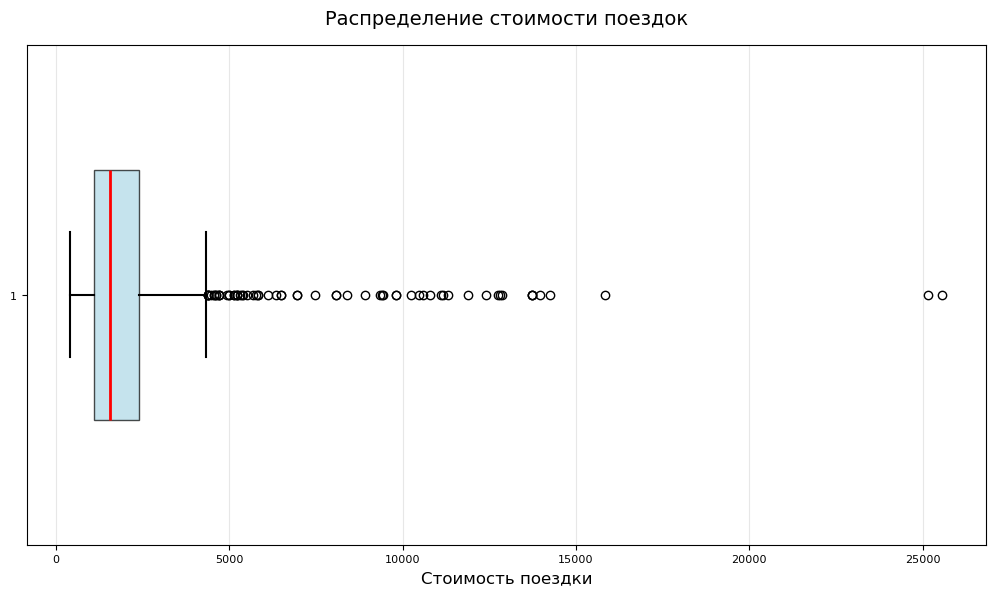

In [24]:
plt.figure(figsize=(10, 6))
box = plt.boxplot(clean_df['price'],
                  vert=False,
                  widths=0.5,
                  patch_artist=True,
                  boxprops=dict(facecolor='lightblue', alpha=0.7),
                  medianprops=dict(color='red', linewidth=2),
                  whiskerprops=dict(color='black', linewidth=1.5),
                  capprops=dict(color='black', linewidth=1.5))

plt.xlabel('Стоимость поездки', fontsize=12)
plt.title('Распределение стоимости поездок', fontsize=14, pad=15)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Вывод**

Медиана стоимости, как уже упоминалось раньше, лежит около 1500. Много выбросов в сторону дорогих поездок - это длинные маршруты.

#### Создание категорий по цене и Boxplot по новым категориям

*`Формулировка задания`* Добавьте категорию по любому числовому столбцу (например, уровень зарплаты -
высокий, низкий, средний). Сделайте boxplot по этому числовому столбцу по каждой
новой категории (на boxplot будет box-ы для средней, низкой и высокой зарплаты).


Для начала происходит определение границ интервалов

Создаётся список границ интервалов (bins), по которым значения price будут разделены на категории.

`0` — нижняя граница (самые дешёвые поездки).

`clean_df['price'].quantile(0.33)` — 33-й перцентиль: значение, ниже которого находится 33% всех поездок (то есть граница между «низкой» и «средней» ценой).

`clean_df['price'].quantile(0.67)` — 67-й перцентиль: граница между «средней» и «высокой» ценой.

`clean_df['price'].max() + 1` — верхняя граница, чуть больше максимального значения, чтобы включить все наблюдения.

Таким образом, диапазон стоимости делится на три части:

от 0 до 33-го перцентиля — низкая стоимость;

от 33-го до 67-го — средняя;

выше 67-го — высокая.

Даллее происходит  разбиение данных по категориям с помощью метода `.cut`

Это функция из библиотеки pandas, которая «режет» числовую переменную на интервалы (bins) и создаёт категориальный столбец.

Параметры:

`clean_df['price']` — признак, который разбивается (стоимость поездки).

`bins=price_bins` — границы интервалов 

`labels=price_labels` — названия категорий 

`include_lowest=True` — гарантирует, что минимальные значения попадут в первый интервал.

In [25]:
price_bins = [0,
              clean_df['price'].quantile(0.33),
              clean_df['price'].quantile(0.67),
              clean_df['price'].max() + 1]
price_labels = ['Низкая', 'Средняя', 'Высокая']
clean_df['price_category'] = pd.cut(clean_df['price'],
                                     bins=price_bins,
                                     labels=price_labels,
                                     include_lowest=True)

clean_df['price_category'].value_counts().sort_index()

C:\Users\Mi\AppData\Local\Temp\ipykernel_3128\1186844892.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['price_category'] = pd.cut(clean_df['price'],


price_category
Низкая     382
Средняя    354
Высокая    359
Name: count, dtype: int64

Для каждой ценовой категории строится отдельный boxplot, показывающий:

медиану (центральную красную или чёрную линию внутри ящика);

границы 25% и 75% (нижняя и верхняя стенки ящика);

“усы” — диапазон типичных значений;

выбросы — отдельные точки за пределами усов.

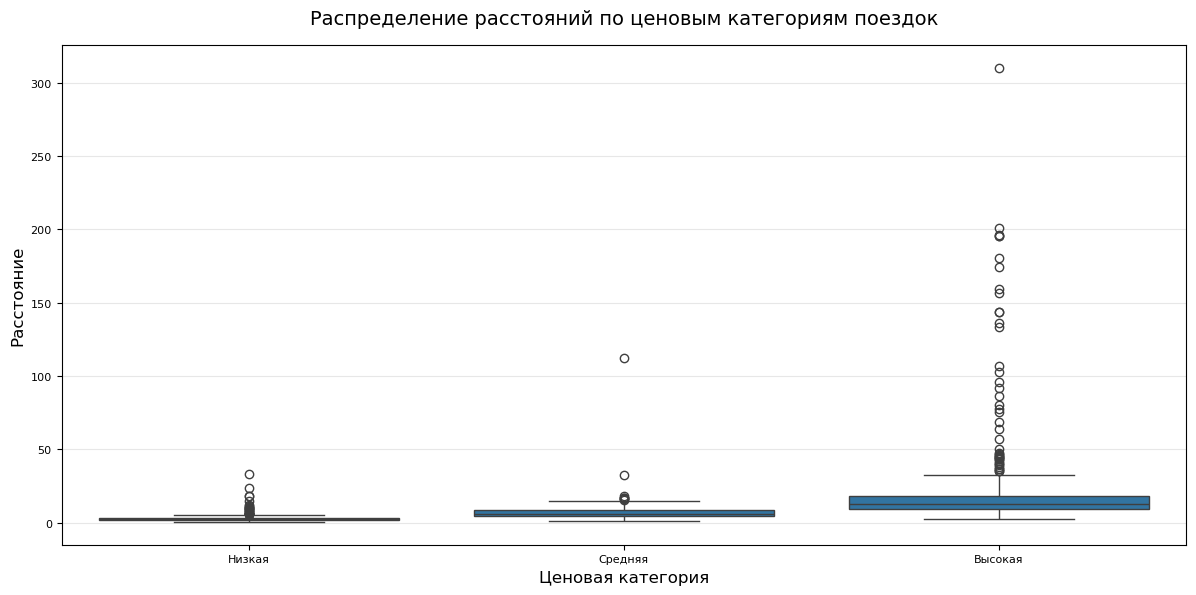

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=clean_df, x='price_category', y='miles')
plt.xlabel('Ценовая категория', fontsize=12)
plt.ylabel('Расстояние', fontsize=12)
plt.title('Распределение расстояний по ценовым категориям поездок', fontsize=14, pad=15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Вывод**

Можно заметить, что дорогие поездки дальше по расстоянию и соответственно  и дороже, а дешевые поездки совершаются на небольшие расстояния.

###  Boxplot по существующим категориям

*`Формулировка задания`* Выполните ещё минимум 2 графика boxplot по другим категориям (например,
зарплата по полу, зарплата по должности и т.п. - в результате несколько box-ов для
каждой категории на ном графике). Используйте для построения графиков разные
библиотеки (минимум 2). Сделайте вывод.


Создаёт список массивов цен — отдельно для каждой категории.
То есть price_data[0] содержит все цены поездок категории Business, price_data[1] — Personal и т.д.

метод ` .boxplot ` строит boxplot — график, показывающий распределение данных: медиану, квартильный размах и выбросы.
Параметры отвечают за оформление:

`patch_artist=True` — заливает прямоугольники цветом;

`boxprops` — задаёт стиль “ящика” (цвет, прозрачность);

`medianprops` — цвет и толщина линии медианы;

`whiskerprops`, `capprops` — стиль “усов” и ограничителей;

`flierprops` — вид точек-выбросов.

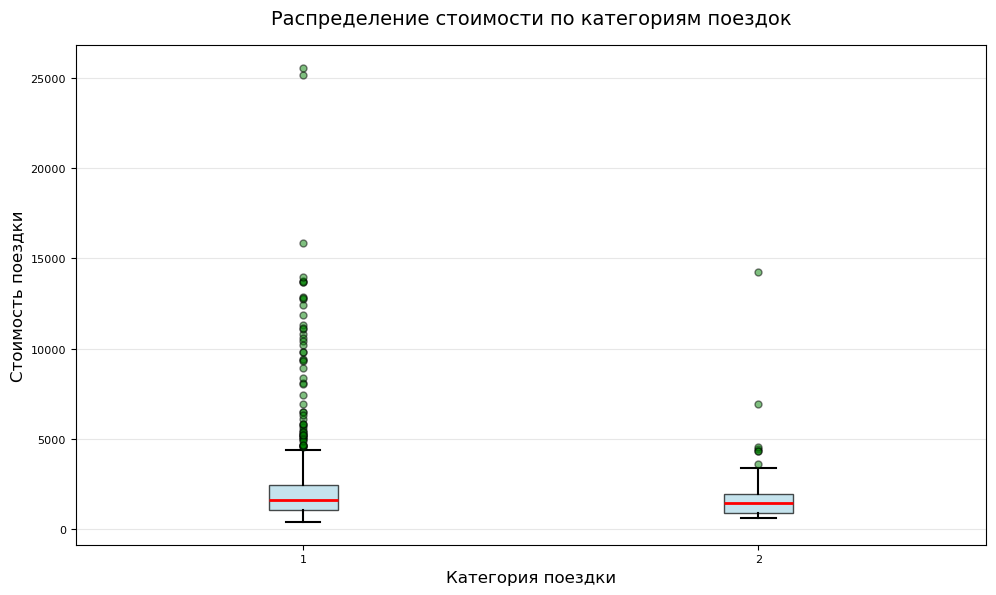

In [27]:
# Получает список уникальных категорий поездок (например, Business и Personal).
categories = clean_df['category'].unique()

price_data = [clean_df[clean_df['category'] == cat]['price'].values for cat in categories]

plt.figure(figsize=(10, 6))

box = plt.boxplot(price_data,
                  patch_artist=True,
                  boxprops=dict(facecolor='lightblue', alpha=0.7),
                  medianprops=dict(color='red', linewidth=2),
                  whiskerprops=dict(color='black', linewidth=1.5),
                  capprops=dict(color='black', linewidth=1.5),
                  flierprops=dict(marker='o', markerfacecolor='green', markersize=5, alpha=0.5))

plt.xlabel('Категория поездки', fontsize=12)
plt.ylabel('Стоимость поездки', fontsize=12)
plt.title('Распределение стоимости по категориям поездок', fontsize=14, pad=15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Вывод**

Можно сделать вывод что Business поездки дороже Personal

**Второе распределение**

Аналогичным образом построим распределение стоимости по целям поездки

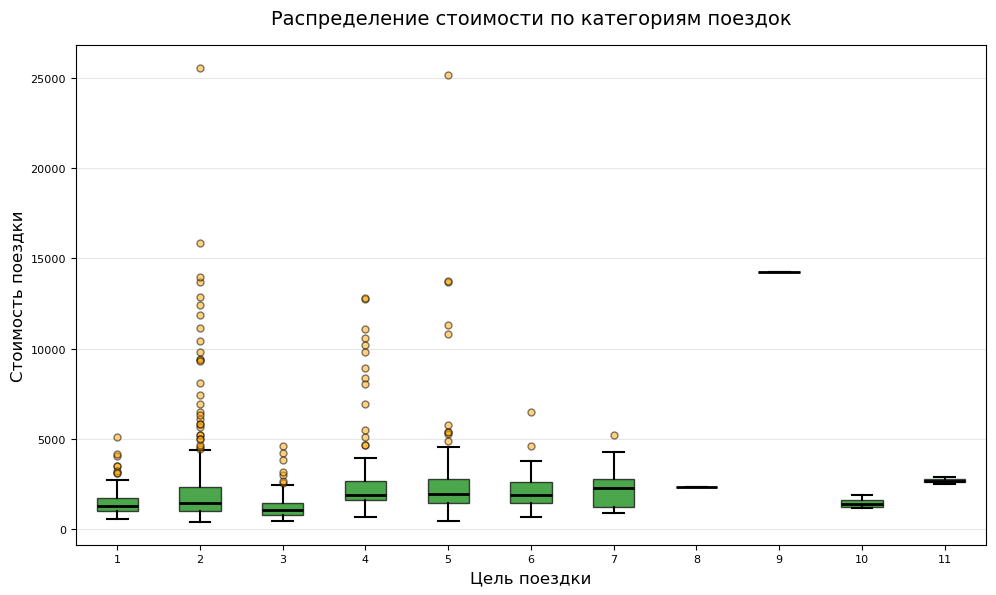

In [28]:
# Получает список уникальных категорий поездок (например, Business и Personal).
categories = clean_df['purpose'].unique()

price_data = [clean_df[clean_df['purpose'] == cat]['price'].values for cat in categories]

plt.figure(figsize=(10, 6))

box = plt.boxplot(price_data,
                  patch_artist=True,
                  boxprops=dict(facecolor='green', alpha=0.7),
                  medianprops=dict(color='black', linewidth=2),
                  whiskerprops=dict(color='black', linewidth=1.5),
                  capprops=dict(color='black', linewidth=1.5),
                  flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, alpha=0.5))

plt.xlabel('Цель поездки', fontsize=12)
plt.ylabel('Стоимость поездки', fontsize=12)
plt.title('Распределение стоимости по категориям поездок', fontsize=14, pad=15)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

На графике не наблюдается выраженной зависимости стоимости поездки от её цели. Категория Commute содержит недостаточное количество наблюдений для уверенных выводов, однако можно предположить, что средняя стоимость таких поездок может быть выше из-за их потенциально большей продолжительности, хотя это не подтверждается однозначно.

### Вывод

В ходе лабораторной работы была проведена полная предобработка данных набора drivers2.csv: устранены пропуски, дубликаты и аномальные записи, что позволило получить корректный датасет для анализа.

Анализ попарных зависимостей показал, что стоимость поездки (price) напрямую зависит от времени (time) и расстояния (miles) — коэффициенты корреляции превышают 0.85, что подтверждает сильную линейную связь. Средняя скорость (speed) не коррелирует с ценой, что объясняется фиксированной тарифной структурой, где решающее влияние оказывают длительность и протяжённость маршрута.

Построенные гистограммы выявили выраженную правостороннюю асимметрию распределений: большинство поездок короткие и недорогие, со временем менее 20 минут, расстоянием до 15 миль и стоимостью до 2000. Это указывает на преобладание повседневных коротких маршрутов.

Тепловая карта корреляций и график hexagonal binning plot подтвердили наличие положительной зависимости между временем и ценой поездки, причём максимальная плотность наблюдений приходится на диапазон около 10 минут и 1500 по стоимости.

Исследование по категориям показало, что поездки Business преобладают и чаще связаны с целями Meeting и Meal/Entertain, тогда как Personal характеризуются неуточнёнными целями. Самые длинные маршруты наблюдались для целей Commute (≈180 миль), что согласуется с их назначением.

Boxplot-анализ подтвердил логичное распределение: чем выше ценовая категория, тем больше среднее расстояние поездки. Также установлено, что Business-поездки дороже Personal, что отражает специфику корпоративных перемещений.

Таким образом, исследовательский анализ данных позволил выявить ключевые закономерности в поведении признаков, подтвердить влияние расстояния и времени на стоимость, а также установить особенности распределения и категориальных различий. Работа продемонстрировала эффективность инструментов визуализации (Seaborn, Matplotlib, Pandas) для интерпретации взаимосвязей и анализа структуры данных.


### Дополнительное задание

**`Подробная формулировка задания`**


**Выводы**